In [19]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [20]:
DATA_PATH = "../data_25ms.json"

In [21]:
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [22]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [23]:
# load data
X, y = load_data(DATA_PATH)

# normalize dataset

# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Data succesfully loaded!
(286919, 3, 4)


In [24]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,426 (79.79 KB)

 Trainable params: 20,426 (79.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.3778 - loss: 7.1397 - val_accuracy: 0.5222 - val_loss: 1.0383
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.4722 - loss: 1.1002 - val_accuracy: 0.5260 - val_loss: 0.9788
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.4968 - loss: 1.0195 - val_accuracy: 0.5396 - val_loss: 0.9357
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.5261 - loss: 0.9564 - val_accuracy: 0.5606 - val_loss: 0.9081
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.5496 - loss: 0.9264 - val_accuracy: 0.5647 - val_loss: 0.8894
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.5575 - loss: 0.9063 - val_accuracy: 0.5706 - val_loss: 0.8785
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.5625 - loss: 0.8976 - val_accuracy: 0.5712 - val_loss: 0.8708
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.5697 - loss: 0

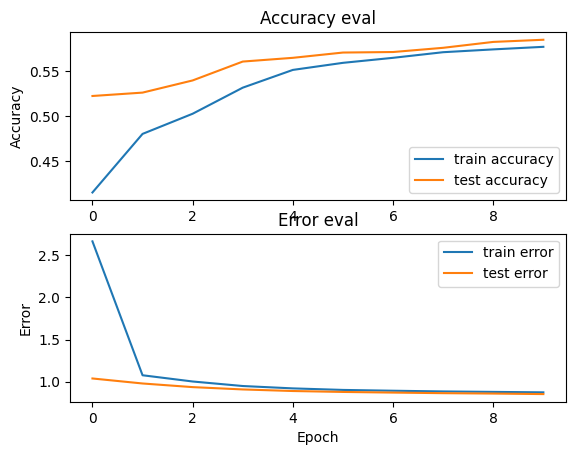

In [25]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10)

# plot accuracy and error as a function of the epochs
plot_history(history)

In [26]:
# predict on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

2690/2690 - 3s - 1ms/step - accuracy: 0.5848 - loss: 0.8530

Test accuracy: 0.5848320126533508


In [27]:
# predict on a sample
X_to_predict = X_test[100]
y_to_predict = y_test[100]
X_to_predict = X_to_predict[np.newaxis, ...]
prediction = model.predict(X_to_predict)
predicted_index = np.argmax(prediction)
print(f"Target: {y_to_predict}, Predicted label: {predicted_index}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Target: 1, Predicted label: 1
